<a href="https://colab.research.google.com/github/malikbf5/Whale-Optimization-Algorithm/blob/main/WOA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Definition of the Ackley function
The Ackley function is widely used for testing optimization algorithms. In its two-dimensional form it is characterized by a nearly flat outer region, and a large hole at the centre. The function poses a risk for optimization algorithms, particularly hill climbing algorithms, to be trapped in one of its many local minima.
---



In [1]:
import random
import math  
import copy  
import sys  
import numpy as np
import matplotlib.pyplot as plt

# ackley function
def fitness_ackley(position):
    # recommended values for a, b and c
    a = 20
    b = 0.2
    c = 2 * np.pi
    term_1 = 0
    term_2 = 0
    for i in range(len(position)):
        xi = position[i]
        term_1 += (xi**2)/len(position)
        term_2 += np.cos(c*xi)/len(position)
    fitness_value = -a*np.exp(-b*np.sqrt(term_1)) - np.exp(term_2) + a + np.exp(1)
    return fitness_value

#Whale class

In [2]:
class whale:
    def __init__(self, fitness, dim, minx, maxx, seed):
        self.rnd = random.Random(seed)
        self.position = [0.0 for i in range(dim)]
 
        for i in range(dim):
            self.position[i] = ((maxx - minx) * self.rnd.random() + minx)
 
        self.fitness = fitness(self.position)  

#WOA algorithm

In [3]:
def woa(fitness, max_iter, n, dim, minx, maxx):
    rnd = random.Random(0)
 
    # create n random whales
    whalePopulation = [whale(fitness, dim, minx, maxx, i) for i in range(n)]
 
    # compute the value of best_position and best_fitness in the whale Population
    Xbest = [0.0 for i in range(dim)]
    Fbest = sys.float_info.max
 
    for i in range(n):  # check each whale
        if whalePopulation[i].fitness < Fbest:
            Fbest = whalePopulation[i].fitness
            Xbest = copy.copy(whalePopulation[i].position)
 
    # main loop of woa
    t = 0
    while t < max_iter:
 
        # after every 10 iterations
        # print iteration number and best fitness value so far
        if t % 10 == 0 and t > 1:
            print("Iter = " + str(t) + " best fitness = %.3f" % Fbest)
 
        # linearly decreased from 2 to 0
        a = 2 * (1 - t / max_iter)
        a2=-1+t*((-1)/max_iter)
 
        for i in range(n):
            A = 2 * a * rnd.random() - a
            C = 2 * rnd.random()
            b = 1
            l = (a2-1)*rnd.random()+1;
            p = rnd.random()
 
            D = [0.0 for i in range(dim)]
            D1 = [0.0 for i in range(dim)]
            Xnew = [0.0 for i in range(dim)]
            Xrand = [0.0 for i in range(dim)]
            if p < 0.5:
                if abs(A) > 1:
                    for j in range(dim):
                        D[j] = abs(C * Xbest[j] - whalePopulation[i].position[j])
                        Xnew[j] = Xbest[j] - A * D[j]
                else:
                    p = random.randint(0, n - 1)
                    while (p == i):
                        p = random.randint(0, n - 1)
 
                    Xrand = whalePopulation[p].position
 
                    for j in range(dim):
                        D[j] = abs(C * Xrand[j] - whalePopulation[i].position[j])
                        Xnew[j] = Xrand[j] - A * D[j]
            else:
                for j in range(dim):
                    D1[j] = abs(Xbest[j] - whalePopulation[i].position[j])
                    Xnew[j] = D1[j] * math.exp(b * l) * math.cos(2 * math.pi * l) + Xbest[j]
 
            for j in range(dim):
                whalePopulation[i].position[j] = Xnew[j]
 
        for i in range(n):
            # if Xnew < minx OR Xnew > maxx
            # then clip it
            for j in range(dim):
                whalePopulation[i].position[j] = max(whalePopulation[i].position[j], minx)
                whalePopulation[i].position[j] = min(whalePopulation[i].position[j], maxx)
 
            whalePopulation[i].fitness = fitness(whalePopulation[i].position)
 
            if (whalePopulation[i].fitness < Fbest):
                Xbest = copy.copy(whalePopulation[i].position)
                Fbest = whalePopulation[i].fitness
 
 
        t += 1
    # end-while
 
    # returning the best solution
    return Xbest

#Application of the algorithm on the Ackley function 


Begin whale optimization algorithm on ackley's function

Goal is to minimize ackley's function in 2 variables
Function has known min = 0.0 at (0, 0)
Setting num_whales = 50
Setting max_iter    = 150

Starting WOA algorithm

Iter = 10 best fitness = 0.060
Iter = 20 best fitness = 0.018
Iter = 30 best fitness = 0.013
Iter = 40 best fitness = 0.004
Iter = 50 best fitness = 0.003
Iter = 60 best fitness = 0.001
Iter = 70 best fitness = 0.000
Iter = 80 best fitness = 0.000
Iter = 90 best fitness = 0.000
Iter = 100 best fitness = 0.000
Iter = 110 best fitness = 0.000
Iter = 120 best fitness = 0.000
Iter = 130 best fitness = 0.000
Iter = 140 best fitness = 0.000

WOA completed


Best solution found:
['0.000000', '-0.000000']
fitness of best solution = 0.000000

End WOA for ackley's function



<ipython-input-4-73b27610cbe7>:35: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca( projection='3d')


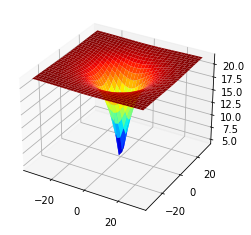

In [4]:
print("\nBegin whale optimization algorithm on ackley's function\n")
dim = 2
fitness = fitness_ackley
 
print("Goal is to minimize ackley's function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim - 1):
    print("0, ", end="")
print("0)")
 
num_whales = 50
max_iter = 150
 
print("Setting num_whales = " + str(num_whales))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting WOA algorithm\n")
 
best_position = woa(fitness, max_iter, num_whales, dim, -10.0, 10.0)
 
print("\nWOA completed\n")
print("\nBest solution found:")
print(["%.6f" % best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)
 
print("\nEnd WOA for ackley's function\n")

# Visualization of the Ackley function in 3D
r_min, r_max = -32.768, 32.768
xaxis = np.arange(r_min, r_max, 2.0)
yaxis = np.arange(r_min, r_max, 2.0)
x, y = np.meshgrid(xaxis, yaxis)
results = fitness_ackley([x, y])
figure = plt.figure()
axis = figure.gca( projection='3d')
axis.plot_surface(x, y, results, cmap='jet', shade= "false")
plt.show()
